In [68]:
%matplotlib inline

from pathlib import Path 

import matplotlib.pyplot as plt
from mpl_toolkits import axisartist
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
# make this a two axis - broken apart and combined
slide_path = Path('../../../slides/figures/math/')
proposal_path = Path('../../../draft/figures/math/')

In [69]:
df = pd.read_csv("../../intro/nydata")

In [70]:
df['DATE2'] = pd.to_datetime(df['DATE'])

In [71]:
df['NAME'].unique()

array(['GANG MILLS NEW YORK', 'SARA NEW YORK', 'SCHROON LAKE NEW YORK',
       'SHERBURNE NEW YORK', 'STONYKILL NEW YORK', 'BINGHAMTON',
       'ISLIP LI MACARTHUR AP', 'NEW YORK LAGUARDIA AP', 'BUFFALO',
       'ALBANY AP', 'GLENS FALLS AP', 'ROCHESTER GTR INTL AP',
       'SYRACUSE HANCOCK INTL AP', 'NEW YORK JFK INTL AP'], dtype=object)

In [72]:
jfk = df[df['NAME'].str.contains("NEW YORK JFK INTL AP")]
lga = df[df['NAME'].str.contains("NEW YORK LAGUARDIA AP")]

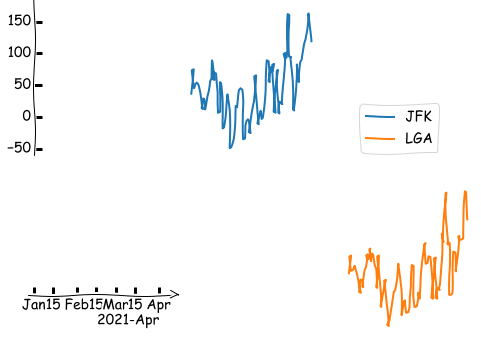

In [74]:
with plt.xkcd():
    fig = plt.figure(figsize=(8,6))


    axx = axisartist.Subplot(fig, 2, 3, 1)
    fig.add_subplot(axx)
    axx.axis[:].set_visible(False)
    axx.axis["x"] = axx.new_floating_axis(1, 0.5)
    axx.axis["x"].set_axisline_style("->", size=1.5)
    axx.axis["x"].set_ticklabel_direction("-")
    axx.axis["x"].set_axis_direction("left")
    axx.tick_params(rotation=0)
    axx.plot(lga['DATE'], lga['DATA_VALUE'], color='white')

    axy = axisartist.Subplot(fig, 2, 3, 4)
    fig.add_subplot(axy)
    axy.axis[:].set_visible(False)
    axy.axis["x"] = axy.new_floating_axis(0, 0.5)
    axy.axis["x"].set_axisline_style("->", size=1.5)
    axy.plot(lga['DATE2'], lga['DATA_VALUE'], color='white')
    axy.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator))

    axd = fig.add_subplot(2,3,2)
    axd.plot(jfk['DATE2'], jfk['DATA_VALUE'], color='tab:blue', label="JFK")
    axd.axis('off')

    axd2 = fig.add_subplot(2,3,6)
    axd2.plot(lga['DATE2'], lga['DATA_VALUE'], color='tab:orange', label="LGA")
    axd2.axis('off')

    fig.legend(bbox_to_anchor=(.85,.67))
    fig.savefig(slide_path/"exploding_artist.png")
    fig.savefig(proposal_path/"exploding_artist.png")

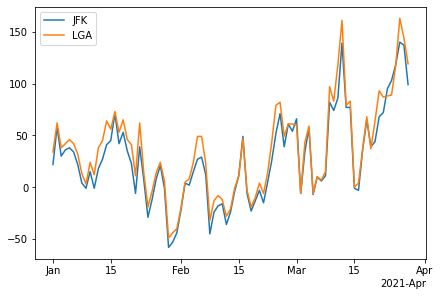

In [75]:
fig, axd = plt.subplot_mosaic([['all']], constrained_layout=True)
   

axd['all'].plot(jfk['DATE2'], jfk['DATA_VALUE'], color='tab:blue', label="JFK")
axd['all'].plot(lga['DATE2'], lga['DATA_VALUE'], color='tab:orange', label="LGA")
axd['all'].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator))
axd['all'].legend()
fig.savefig(proposal_path/"combined_artist.png")

In [53]:
jh